In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

In [102]:
def generate_wordcloud(data, title, color, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=100,
                      colormap=color,
                      mask=mask,
                      background_color='black',
                      collocations=True,
                      contour_color='#5d0f24',
                      contour_width=3).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [34]:
df1 = pd.read_csv('TweetsCOV19_part1.tsv', sep='\t', header=None, on_bad_lines='skip')
df2 = pd.read_csv('TweetsCOV19_part2.tsv', sep='\t', header=None, on_bad_lines='skip')
df3 = pd.read_csv('TweetsCOV19_part3.tsv', sep='\t', header=None, on_bad_lines='skip')

data = [df1, df2, df3]
df = pd.concat(data)

df.columns = ['TweetID', 'Username', 'Timestamp', 'N_Followers', 'N_Friends', 'N_Retweets', 'N_Favorites',
             'Entities', 'Sentiment', 'Mentions', 'Hashtags', 'URLs']
df = df[df.Entities != 'null;']
df['Original_Entities'] = [[entity.split(':')[0] for entity in entity_group.split(';')[:-1]] 
                           for entity_group in df['Entities']]
df['Annotated_Entities'] = [[entity.split(':')[1] for entity in entity_group.split(';')[:-1]] 
                            for entity_group in df['Entities']]
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.strftime("%Y-%m-%d")
df['Positive_Sentiment'] = [int(x[0]) for x in df['Sentiment']]
df['Negative_Sentiment'] = [int(x[-2:]) for x in df['Sentiment']]
df['Overall_Sentiment'] = df['Positive_Sentiment'] + df['Negative_Sentiment']
df = df.drop(['Entities', 'URLs', 'Sentiment'], axis=1)

In [42]:
# df.to_csv('processed.csv',index=False)
df = pd.read_csv('processed.csv')

In [143]:
category = pd.cut(df.Overall_Sentiment,bins=[-5,-1,1,5],labels=['Negative', 'Neutral', 'Positive'])
df.insert(11,'Sentiment_Group',category)

In [43]:
len(df)

13905671

In [44]:
user = list(set(df.Username))
len(user)

5365625

In [20]:
df.isnull().sum()

TweetID                   0
Username                  0
Timestamp                 0
N_Followers               0
N_Friends                 0
N_Retweets                0
N_Favorites               0
Mentions              14458
Hashtags               2654
Original_Entities         0
Annotated_Entities        0
Positive_Sentiment        0
Negative_Sentiment        0
Overall_Sentiment         0
dtype: int64

In [21]:
df.dtypes

TweetID                int64
Username              object
Timestamp             object
N_Followers            int64
N_Friends              int64
N_Retweets             int64
N_Favorites            int64
Mentions              object
Hashtags              object
Original_Entities     object
Annotated_Entities    object
Positive_Sentiment     int64
Negative_Sentiment     int64
Overall_Sentiment      int64
dtype: object

In [144]:
df.head()

,TweetID,Username,Timestamp,N_Followers,N_Friends,N_Retweets,N_Favorites,Mentions,Hashtags,Original_Entities,Annotated_Entities,Sentiment_Group,Positive_Sentiment,Negative_Sentiment,Overall_Sentiment
1,1178791985106153472,ea4592f39636d87af8fb4b17b7e2e4c0,2019-09-30,36365,19344,13,17,null;,null;,"[nazi, blood money]","[Nazism, Blood_money_%28restitution%29]",Negative,1,-4,-3
2,1178793230223183872,bf05d1888dd974fa4a8679c25e2ead03,2019-09-30,5018,1933,0,0,null;,null;,"[vaccine, anti vaxxer, blog]","[Vaccine, Vaccine_hesitancy, Blog]",Neutral,2,-1,1
3,1178795172206919680,eb8a99bca8945eab1d006750e9b75518,2019-09-30,2219,971,0,0,null;,null;,"[muse, talking to you]","[Muse_%28band%29, Talking_to_You]",Neutral,2,-1,1
4,1178798309491822592,00695cf79d60e86a5d0f872f4358337a,2019-09-30,9009,4943,26,89,null;,VFS,"[people of northern ireland, vfs]","[People_of_Northern_Ireland, Virtual_file_system]",Neutral,2,-1,1
5,1178801459439296514,6ff6c6532fe0c399dcedd1dad6249c28,2019-09-30,284,935,0,0,null;,null;,[cnn],[CNN],Neutral,3,-2,1


In [46]:
df.describe()

,TweetID,N_Followers,N_Friends,N_Retweets,N_Favorites,Positive_Sentiment,Negative_Sentiment,Overall_Sentiment
count,1.390567e+07,1.390567e+07,1.390567e+07,1.390567e+07,1.390567e+07,1.390567e+07,1.390567e+07,1.390567e+07
mean,1.270194e+18,2.723489e+05,3.569433e+03,4.287687e+01,1.435846e+02,1.617507e+00,-1.663811e+00,-4.630463e-02
std,4.019672e+16,2.346740e+06,1.882051e+04,5.589975e+02,2.300909e+03,7.632503e-01,1.012247e+00,1.248462e+00
min,1.178792e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-5.000000e+00,-4.000000e+00
25%,1.243198e+18,1.930000e+02,1.810000e+02,0.000000e+00,0.000000e+00,1.000000e+00,-2.000000e+00,-1.000000e+00
50%,1.266725e+18,1.340000e+03,5.870000e+02,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
75%,1.302189e+18,1.254900e+04,1.824000e+03,1.000000e+01,2.200000e+01,2.000000e+00,-1.000000e+00,1.000000e+00
max,1.344780e+18,1.273872e+08,4.486562e+06,2.574670e+05,1.060986e+06,5.000000e+00,-1.000000e+00,4.000000e+00


In [139]:
df_robots = df[(df['N_Followers'] == 0) & (df['N_Friends'] == 0)]

In [140]:
len(df_robots)

44739

In [142]:
df_robots[df_robots['N_Retweets']!=0]

,TweetID,Username,Timestamp,N_Followers,N_Friends,N_Retweets,N_Favorites,Mentions,Hashtags,Original_Entities,Annotated_Entities,Positive_Sentiment,Negative_Sentiment,Overall_Sentiment
21425,1186963439907786753,5f77232ddd29dff1413db6ed7813e0f8,2019-10-23,0,0,29,1,null;,justiceforharsha fightforharsha Lets,[frnd],[Andrew_Goldstein_%28musician%29],1,-3,-2
33442,1186663696518414336,fc72e25498a5930ab55621c4ec1b2ed5,2019-10-22,0,0,1,1,narendramodi tarak9999 HeroManoj1,justiceforharsha,"[manchu manoj, banglore, retweet, retweet, tweet]","[Manchu_Manoj, Bangalore, Twitter, Twitter, Tw...",3,-1,2
34573,1187648411580780545,ac1d90e43e1963d1e2dddeee9fcf205e,2019-10-25,0,0,1,0,SATYAPR02859931 NorthenRailway PiyushGoyal Rai...,null;,"[indian railway, bihar]","[Indian_Railways, Bihar]",1,-1,0
35932,1188946811010113536,51de83cb66864f59246299ccf700ebbf,2019-10-28,0,0,1,0,null;,null;,[it happens all the time],[It_Happens_All_the_Time],1,-1,0
53776,1182638378820329477,c2407e5599eac1d8d5912108f9555cd6,2019-10-11,0,0,2,1,null;,bennywenda freewestpapua papua wamena wamenabe...,"[indonesia, benny wenda, wamena]","[Indonesia, Benny_Wenda, Wamena]",1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944035,1336326351825956865,9dac7e14a6a1b5ced145a4efa92a5fba,2020-12-08,0,0,10,46,null;,null;,"[rapper, rapper, best boy, best boy]","[Rapping, Rapping, Best_Boy_%28film%29, Best_B...",2,-1,1
9949073,1342066519140790272,0a0ae71e96a3c1e762aca7261f33b8c4,2020-12-24,0,0,2,1,drashwathcn BSYBJP,vtukillingstudents StudentsLivesMatter vtucanc...,[vtu],[Visvesvaraya_Technological_University],1,-1,0
9952333,1334759969711800320,9349eb314a99575dd17e047144659f21,2020-12-04,0,0,2,0,null;,HimachalPradesh Jammu bihar Jharkhand Odisha U...,"[uttarakhand, maharastra, jharkhand, karnataka...","[Uttarakhand, Maharashtra, Jharkhand, Karnatak...",1,-1,0
9955603,1338726866211885056,b9dfadaa2b8699bef69987963c05700f,2020-12-15,0,0,6,6,null;,null;,"[dinghai, vaccine]","[Dinghai_District, Vaccine]",1,-1,0


In [119]:
hashtags_list = list(set(df['Hashtags']))

In [121]:
hashtags_list[0:10]

['AfterThePandemic KayBurley',
 'YourPersonalBest YourPersonalBest',
 'srk',
 'NYC NormanReedus COVID_19 NYTough ReedusArt',
 'ALDUBxADN251stWeeksary',
 'sxsw covid',
 'CNN Biden china HunterBiden?',
 'COVID-19 20LakhCoronaPackage',
 'ThisisNotJournalism COVID19Victoria DoBetter',
 'bizjet APAC']

In [122]:
df_groupby_user = df.groupby('Username', as_index=False)\
                    .agg({'N_Followers':'first', 'N_Friends':'first',\
                          'N_Retweets':'sum', 'N_Favorites':'sum', 'Overall_Sentiment':'mean'})

category = pd.cut(df_groupby_user.Overall_Sentiment,bins=[-5,-1,1,5],labels=['Negative', 'Neutral', 'Positive'])
df_groupby_user.insert(6,'Sentiment_Group',category)

In [123]:
df_groupby_user.head()

,Username,N_Followers,N_Friends,N_Retweets,N_Favorites,Overall_Sentiment,Sentiment_Group
0,000000e6bded7cdeaffee6928df45050,2578,27,0,0,0.0,Neutral
1,0000048f8bdf58d9d5afa27556390261,1799,1763,0,0,1.0,Neutral
2,000006f5da1c240d29783090cdf4366a,70,48,0,0,1.0,Neutral
3,00000998260226834ffdbdf98ff33eb7,1852,1482,0,0,0.0,Neutral
4,00000acde99676f7ce3a4efdd9b8cc9c,8,7,25,27,2.0,Positive


In [126]:
df_groupby_user.iloc[df_groupby_user['N_Retweets'].idxmax()]

Username             75224fc65ae453fe9ec3ca855cd8619b
N_Followers                                  65954470
N_Friends                                          47
N_Retweets                                    7721782
N_Favorites                                  32152279
Overall_Sentiment                           -0.067568
Sentiment_Group                               Neutral
Name: 2454522, dtype: object

In [128]:
user_with_most_retweets = df[df['Username'] == '75224fc65ae453fe9ec3ca855cd8619b']
len(user_with_most_retweets)

666

In [131]:
user_with_most_retweets_entities_list = user_with_most_retweets['Original_Entities'].tolist()
user_with_most_retweets_entities_list = [' '.join(l) for l in user_with_most_retweets_entities_list]
user_with_most_retweets_entities_ct_df = pd.DataFrame.from_dict([Counter(user_with_most_retweets_entities_list)]).T
user_with_most_retweets_entities_ct_df.columns = ['count']
user_with_most_retweets_entities_ct_df = user_with_most_retweets_entities_ct_df.sort_values(by=['count'], ascending=False)
user_with_most_retweets_text = ' '.join(user_with_most_retweets_entities_list)
user_with_most_retweets_entities_ct_df.head(10)

,count
china,22
fake news china,10
joe biden,7
democrat,6
covid 19,5
usa,4
republicans,4
colorado,4
the vaccines,4
new york times fake news china,3


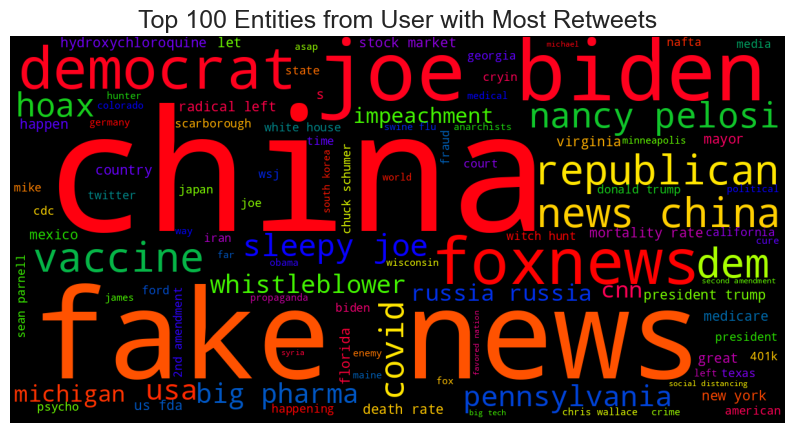

In [132]:
generate_wordcloud(user_with_most_retweets_text, 'Top 100 Entities from User with Most Retweets', 'prism_r')

In [47]:
df_retweet_0 = df[df['N_Retweets'] == 0]
df_retweet_not_0 = df[df['N_Retweets'] != 0]
df_fav_0 = df[df['N_Favorites'] == 0]
df_fav_not_0 = df[df['N_Favorites'] != 0]

# category = pd.cut(df_retweet_not_0.Overall_Sentiment,bins=[-5,-1,1,5],labels=['Negative', 'Neutral', 'Positive'])
# df_retweet_not_0.insert(11,'Sentiment_Group',category)

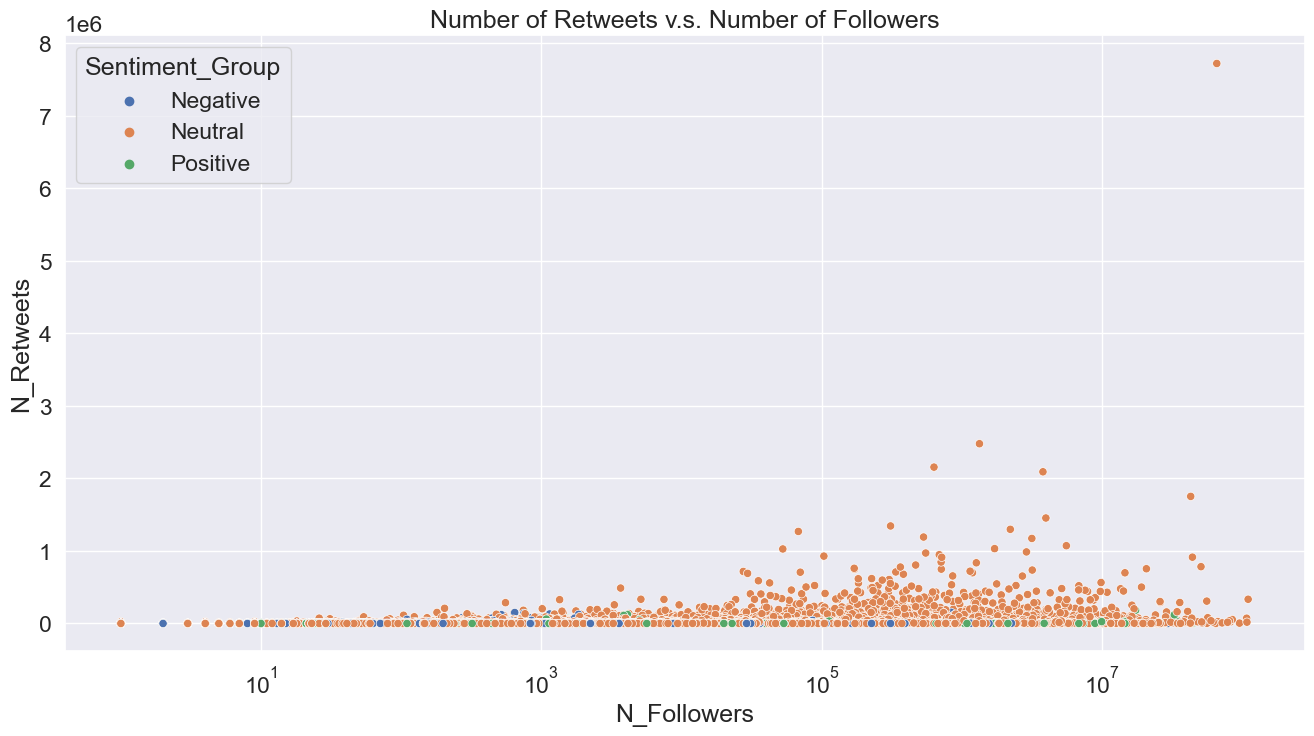

In [134]:
df_groupby_user_retweets_not_0 = df_groupby_user[df_groupby_user['N_Retweets'] != 0]
sns.set_theme()
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(
    x='N_Followers',
    y='N_Retweets',
    data=df_groupby_user_retweets_not_0,
    hue='Sentiment_Group',
    ax=ax
)

ax.set(xscale="log")
ax.set(title='Number of Retweets v.s. Number of Followers')
plt.show()

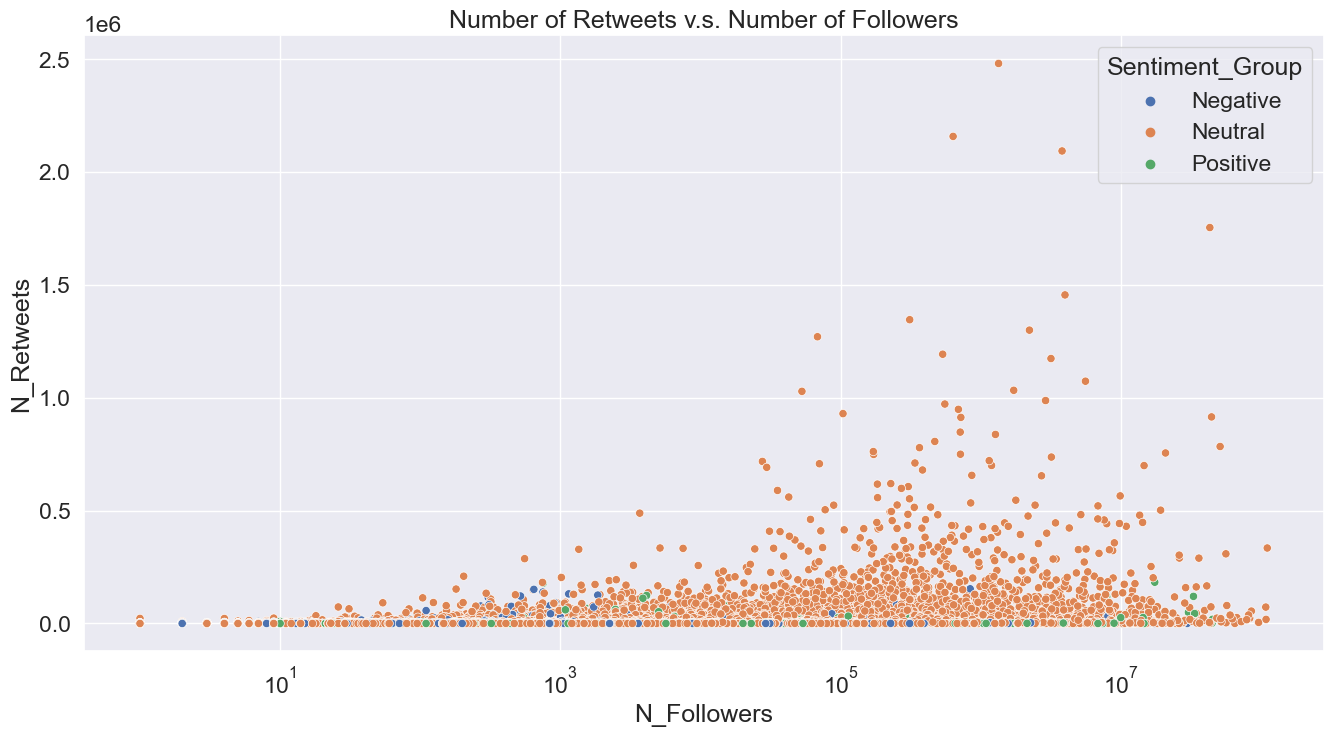

In [136]:
# without user with most retweets
df_groupby_user_retweets_not_0 = df_groupby_user[df_groupby_user['N_Retweets'] != 0]
sns.set_theme()
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(
    x='N_Followers',
    y='N_Retweets',
    data=df_groupby_user_retweets_not_0[df_groupby_user_retweets_not_0['Username'] != '75224fc65ae453fe9ec3ca855cd8619b'],
    hue='Sentiment_Group',
    ax=ax
)

ax.set(xscale="log")
ax.set(title='Number of Retweets v.s. Number of Followers')
plt.show()

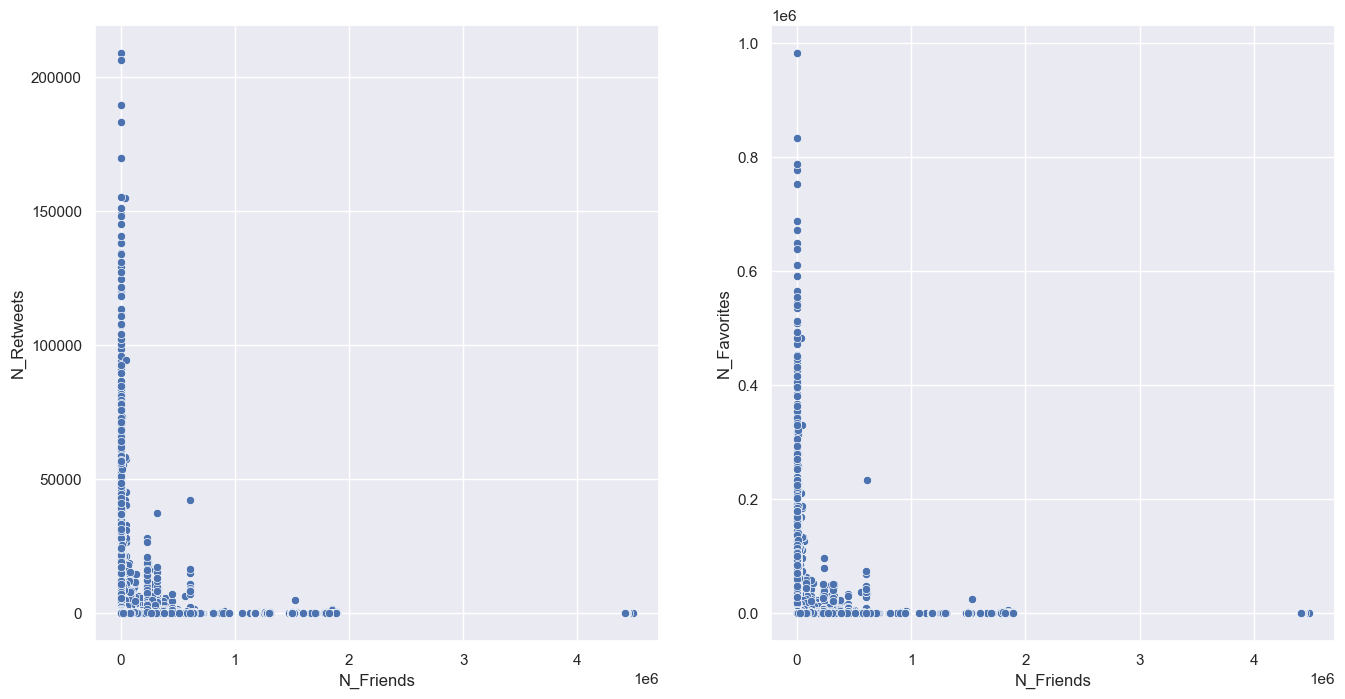

In [156]:

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(
    x='N_Friends',
    y='N_Retweets',
    data=df,
    ax=ax[0]
)

sns.scatterplot(
    x='N_Friends',
    y='N_Favorites',
    data=df,
    ax=ax[1]
)
plt.show()

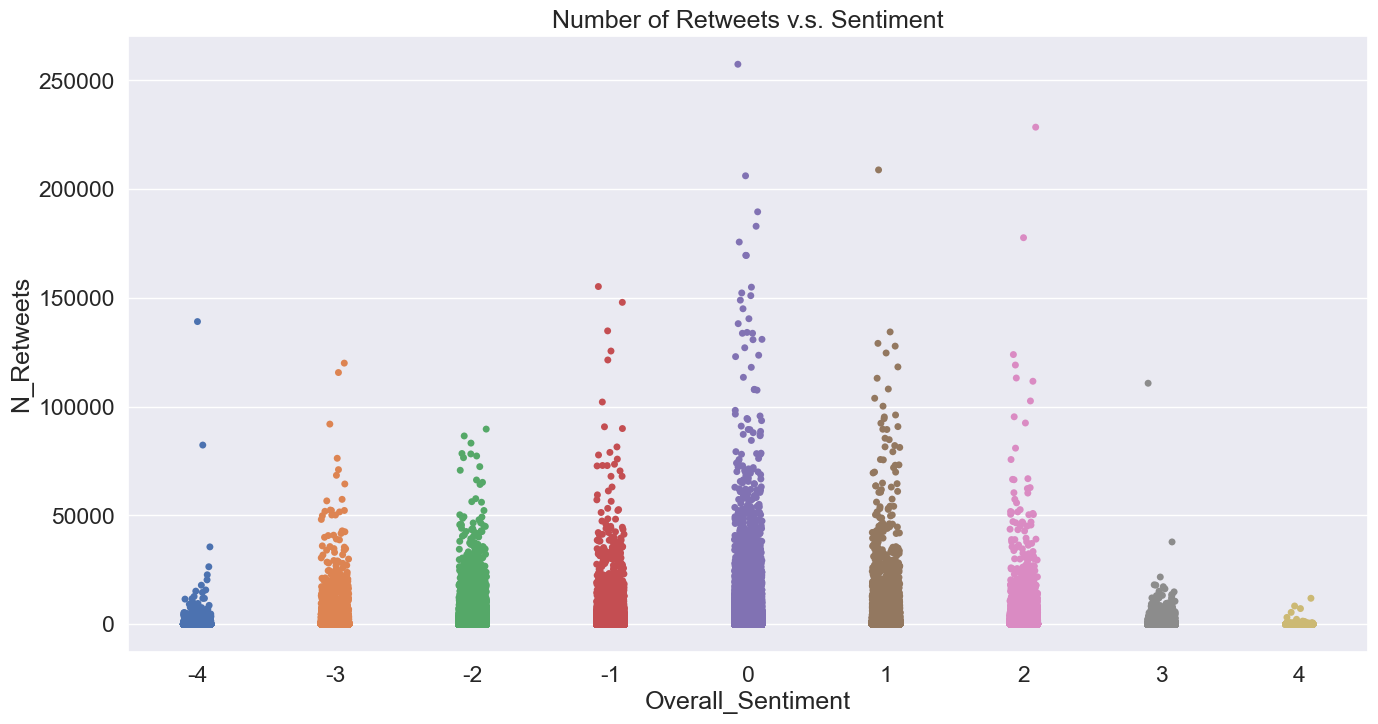

In [111]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 8))
sns.stripplot(data=df_retweet_not_0, x="Overall_Sentiment", y="N_Retweets",ax=ax)
ax.set(title='Number of Retweets v.s. Sentiment')
plt.show()

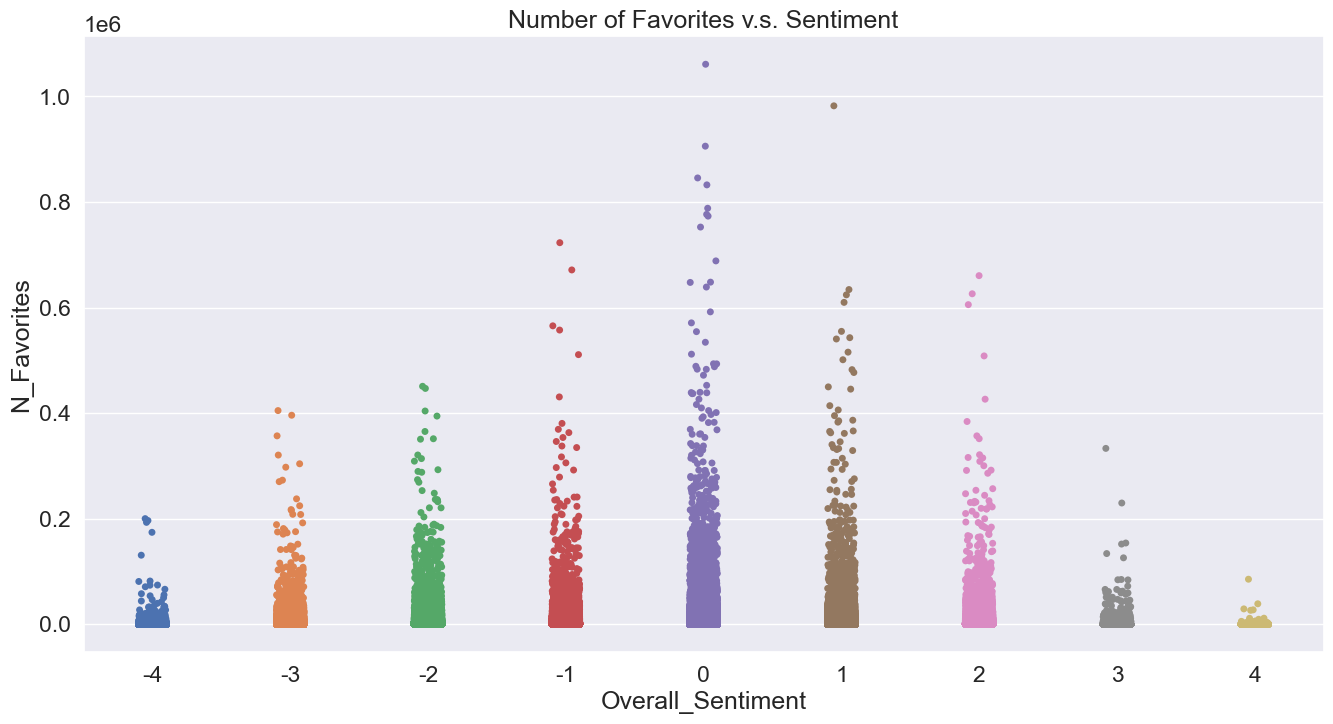

In [112]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 8))
sns.stripplot(data=df_fav_not_0, x="Overall_Sentiment", y="N_Favorites",ax=ax)
ax.set(title='Number of Favorites v.s. Sentiment')
plt.show()

In [53]:
entities_list = df['Original_Entities'].tolist()
entities_list = [' '.join(l) for l in entities_list]
entity_ct_df = pd.DataFrame.from_dict([Counter(entities_list)]).T
entity_ct_df.columns = ['count']
entity_ct_df = entity_ct_df.sort_values(by=['count'], ascending=False)
text = ' '.join(entities_list)
entity_ct_df.head(10)

,count
covid 19,273318
quarantine,222566
china,134624
covid19,106670
social distancing,97076
lol,62750
what s happening,40054
vaccine,38229
cdc,35981
tweet,29417


In [54]:
len(entities_list)

13905671

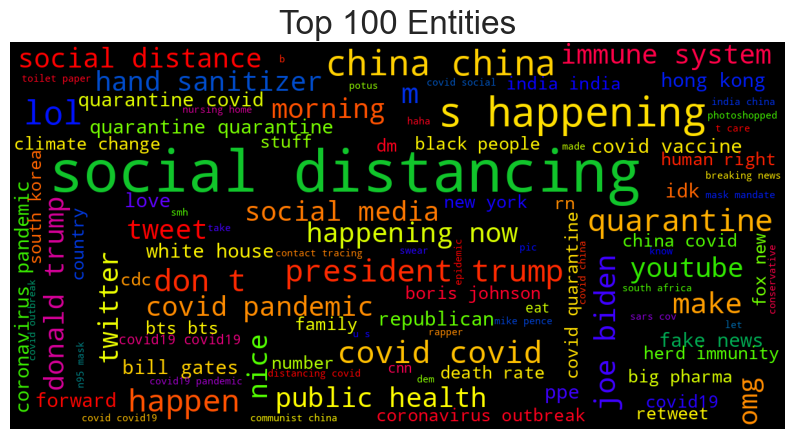

In [110]:
generate_wordcloud(text, 'Top 100 Entities', 'prism_r')
# wordcloud.to_file("top_100_pos_entities.png")
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [56]:
pos_df = df[df['Positive_Sentiment'] == 4]
neg_df = df[df['Negative_Sentiment'] == -4]

In [57]:
len(pos_df)

162741

In [58]:
len(neg_df)

1126816

In [81]:
pos_entity_list = pos_df['Original_Entities'].tolist()
neg_entity_list = neg_df['Original_Entities'].tolist()

In [82]:
pos_entity_list = list(itertools.chain.from_iterable(pos_entity_list))
neg_entity_list = list(itertools.chain.from_iterable(neg_entity_list))

In [83]:
len(pos_entity_list)

349536

In [84]:
len(neg_entity_list)

2420620

In [85]:
pos_entity_ct_df = pd.DataFrame.from_dict([Counter(pos_entity_list)]).T
pos_entity_ct_df.columns = ['count']
pos_entity_ct_df = pos_entity_ct_df.sort_values(by=['count'], ascending=False)
normalized_pos=(pos_entity_ct_df-pos_entity_ct_df.mean())/pos_entity_ct_df.std()


neg_entity_ct_df = pd.DataFrame.from_dict([Counter(neg_entity_list)]).T
neg_entity_ct_df.columns = ['count']
neg_entity_ct_df = neg_entity_ct_df.sort_values(by=['count'], ascending=False)
normalized_neg=(neg_entity_ct_df-neg_entity_ct_df.mean())/neg_entity_ct_df.std()

In [86]:
normalized_pos

,count
covid 19,133.288273
quarantine,93.290814
covid19,74.867641
china,68.848849
jungkook,68.682123
...,...
track day,-0.075492
malcolm mcdowell,-0.075492
botticelli,-0.075492
voina,-0.075492


In [87]:
normalized_neg

,count
covid 19,220.137601
china,200.818066
covid19,96.951619
quarantine,91.522631
social distancing,54.419726
...,...
puddleglum,-0.054494
enemies of society,-0.054494
chris hazzard,-0.054494
bea alonzo,-0.054494


In [88]:
pos_text = ' '.join(pos_entity_list)
neg_text = ' '.join(neg_entity_list)

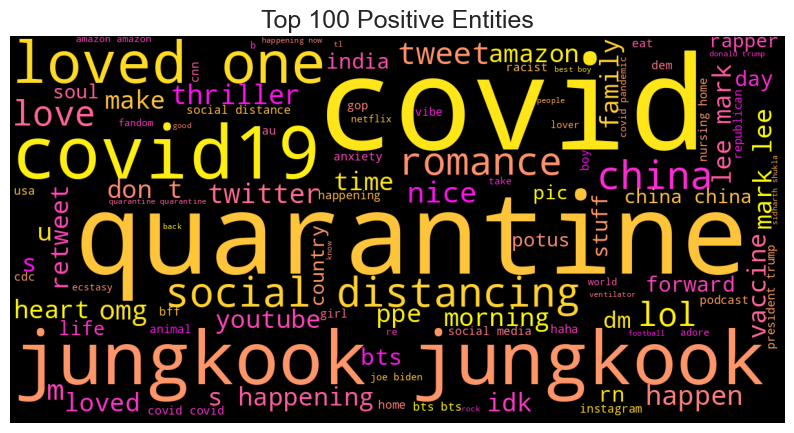

In [113]:
generate_wordcloud(pos_text, 'Top 100 Positive Entities', 'spring')
# wordcloud.to_file("top_100_pos_entities.png")
# wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(pos_text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

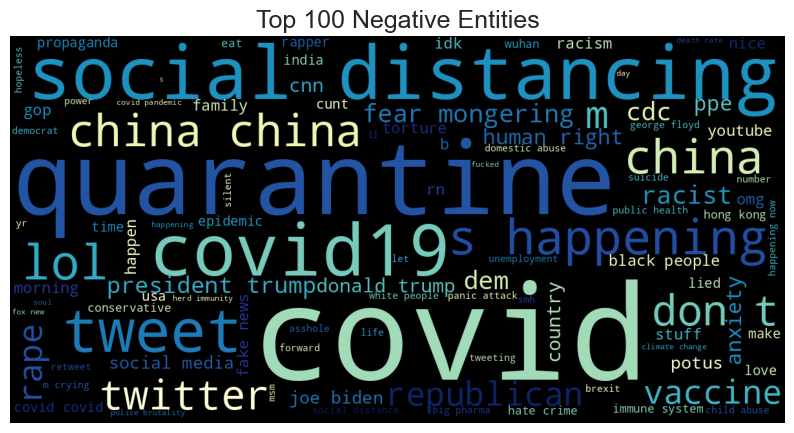

In [114]:
generate_wordcloud(neg_text, 'Top 100 Negative Entities', 'YlGnBu')
# wordcloud.to_file("top_100_neg_entities.png")
# wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(neg_text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [69]:
common_entity_list = list(set(pos_entity_list) & set(neg_entity_list))

In [70]:
len(common_entity_list)

42325

In [71]:
com_pos_entity_ct_df = normalized_pos.filter(items = common_entity_list, axis=0)
com_pos_entity_ct_df.columns = ['pos_count']
com_neg_entity_ct_df = normalized_neg.filter(items = common_entity_list, axis=0)
com_neg_entity_ct_df.columns = ['neg_count']

In [72]:
result = pd.concat([com_pos_entity_ct_df, com_neg_entity_ct_df], axis=1, join="inner")

In [73]:
result

,pos_count,neg_count
How_Do_You_Stop,-0.067703,-0.031833
Pusha_T,-0.040649,-0.020496
Millfield,-0.067703,-0.048838
Antibody_titer,-0.067703,-0.048838
The_Big_C_%28TV_series%29,-0.067703,-0.043169
...,...,...
Breathy_voice,-0.027122,-0.000657
L%27Or%C3%A9al,-0.040649,-0.026164
Plastic_wrap,-0.040649,-0.037501
Negev,-0.067703,-0.040335


In [74]:
entity_with_more_pos_ct = result[result.pos_count > result.neg_count]\
                                .sort_values(by=['pos_count'], ascending=False)
entity_with_more_pos_ct.head(20)

,pos_count,neg_count
Quarantine,76.034633,72.287985
Jungkook,55.784865,3.153788
Romance_film,46.248401,0.917618
Our_Loved_Ones,36.738990,1.167026
Rapping,29.907906,12.982730
Thriller_%28genre%29,25.863363,0.974302
Amazon_%28company%29,24.294243,4.239279
BTS,22.941553,13.271817
Nice,16.705652,12.109802
OMG_%28Usher_song%29,16.123996,13.580743


In [75]:
entity_with_more_neg_ct = result[result.neg_count > result.pos_count]\
                                .sort_values(by=['neg_count'], ascending=False)
entity_with_more_neg_ct.head(20)

,pos_count,neg_count
Coronavirus_disease_2019,169.140281,248.885853
China,58.287341,162.585017
Twitter,52.308451,93.915626
Racism,10.740290,51.445412
Republican_Party_%28United_States%29,13.148078,45.521972
Social_distancing,36.793098,43.815794
LOL,27.297215,34.774754
Rape,1.541998,32.187146
Centers_for_Disease_Control_and_Prevention,7.088027,28.933505
India,11.254312,27.065780
